In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import decomposition
import sys
import warnings; warnings.filterwarnings("ignore")

from aux import get_seg, rand_string
from disp import set_plot, plot_b, trj_3d

from record_0_main import smlt_ma

cc = np.concatenate

FPS = 30.03  # sampling rate of behavioral data
DT = 1/FPS

STRAINS = ['NM91', 'ZH23']
STRAIN_KEY = '_'.join(STRAINS).lower()

FSTRAIN = 'data/simple/strains.csv'
MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

In [2]:
# record activity on the fly
df_behav = pd.read_csv('data/simple/c_song_f_behav.csv')  # load songs
df_trs = [df_behav[df_behav.ID == i] for i in ISTRAIN]
df_behav = None

In [3]:
N = 20

rtau_r = [120, 120]
rtau_a = [.1, 2]

tau_rs = np.random.uniform(*rtau_r, N)
tau_as = np.random.uniform(*rtau_a, N)
x_ss = np.random.uniform(0, 1, N)
x_ps = 1 - x_ss

params = {'TAU_R': tau_rs, 'TAU_A': tau_as, 'X_S': x_ss, 'X_P': x_ps}

In [4]:
rs_20_mas = []

for df_tr in df_trs:
    t = np.array(df_tr['T'])
    
    i_s = np.array(df_tr['S']).astype(float)
    i_p = np.array(df_tr['P'] | df_tr['F']).astype(float)
    
    b = np.zeros(len(t), dtype=int)
    b[i_s == 1] = 1
    b[i_p == 1] = 2

    # simulate population response
    rs_20_ma = smlt_ma(i_s, i_p, params, DT)
    sys.stdout.write('.')
    
    rs_20_mas.append(rs_20_ma)

.......................................................................................

In [5]:
pca_20 = decomposition.PCA().fit(cc(rs_20_mas, axis=0))
var_exp_ma_20 = pca_20.explained_variance_ratio_

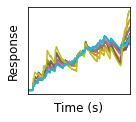

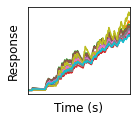

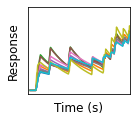

In [14]:
itrs_t_starts_t_ends = [
    (6, -2, 138),
    (0, -2, 130),
    (7, -2, 75),
]

for itr, t_start, t_end in itrs_t_starts_t_ends:
    df_tr = df_trs[itr]
    t = np.array(df_tr['T'])
    
    i_s = np.array(df_tr['S']).astype(float)
    i_p = np.array(df_tr['P'] | df_tr['F']).astype(float)
    
    b = np.zeros(len(t), dtype=int)
    b[i_s == 1] = 1
    b[i_p == 1] = 2

    # simulate population response
    rs = rs_20_mas[itr]
    for cnrn in range(N):
        rs[:, cnrn] /= np.mean(rs[:, cnrn])
    
    # project onto top PCs
    rs_pc = pca_20.transform(rs)
    
    fig, ax = plt.subplots(1, 1, figsize=(2, 1.8), tight_layout=True)
    
    # plot neural responses and song
    ax.plot(t, rs[:, :10], lw=1.5)
    set_plot(ax, x_ticks=[], y_ticks=[], x_lim=(t_start, t_end), x_label='Time (s)', y_label='Response')
    
    fig.savefig(f'ms/fig_5_fast_a_slow_r_song_itr_{itr}.svg')